In [1]:
# Copyright Tay Zhi Cong, year 2025

import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math

#### Appendix: Method to obtain low pass filter tap coeffiecients

In [5]:
def get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, filter_length):
    beta = signal.kaiser_beta(stop_band_attenuation) # 1. calculate the kaiser beta
    #\filter_length = math.ceil((f_sampling/f_transition) * (stop_band_attenuation-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
    filter_tap = signal.windows.kaiser(filter_length, beta=beta)
    #print("estimated filter_length is", filter_length)
    h = np.sinc(2*f_minus_6db/f_sampling*np.linspace(-(filter_length - 1)/2,(filter_length - 1)/2,filter_length))*filter_tap
    h = h/sum(h)
    return h

def plot_filter_to_verify_spec(h, num_fft, f_sampling):
    freq_response = np.fft.fft(h, num_fft)
    freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

    plt.figure()
    ax = plt.subplot(1,2,1)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    ax.set_xlim(0, 50)
    ax.set_ylim(-80, 1)
    
    ax = plt.subplot(2,2,2)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    
    # Define the desired zoom region
    x_min, x_max = 0, 11
    y_min, y_max = -0.1, 0.1
    
    # Set the x and y limits of the axes to zoom to the rectangle
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    
    ax = plt.subplot(2,2,4)
    plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
    plt.grid(which="major")
    plt.grid(which="minor")
    plt.minorticks_on()
    
    # Define the desired zoom region
    x_min, x_max = 18, 22
    y_min, y_max = -80, -50
    
    # Set the x and y limits of the axes to zoom to the rectangle
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


#### Designing an FIR filter with the following spec:

Sample rate: 1.0 MHz \
Pass band: 0 - 10kHz \
Stop band: 20 - fs/2 kHz \
In-band ripple: 0.1dB \
Stop-band attennuation: 60dB


#### Step 1: Get the filter taps coefficients that meet the spec

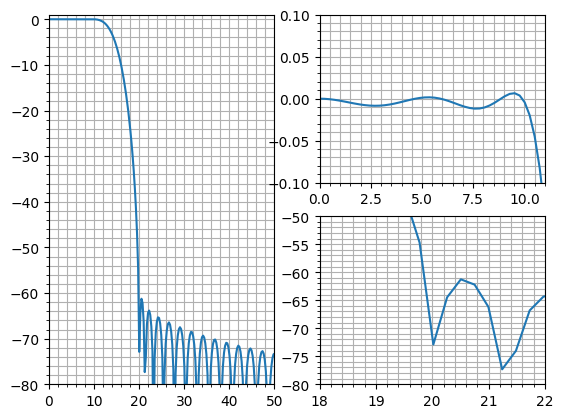

In [67]:
stop_band_attenuation = 60
f_sampling = 1000
f_transition = 10
f_minus_6db = 15
low_pass_filter_length = 373 # use 93
num_fft = 1024*4

# h = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
# h = h/sum(h)
h1 = get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, low_pass_filter_length)
plot_filter_to_verify_spec(h1, num_fft, f_sampling)


#### Step 2: Repeat the same design with a sample rate of 500kHz

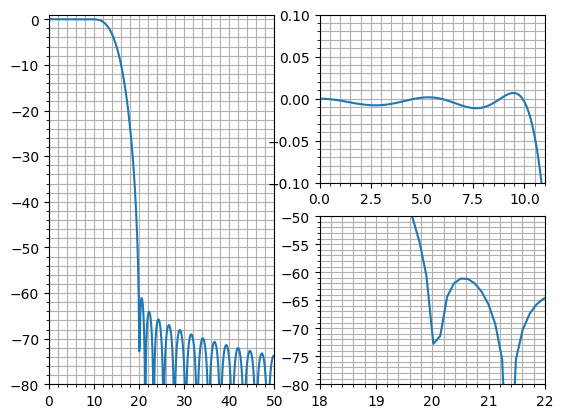

In [7]:
stop_band_attenuation = 60
f_sampling = 500
f_transition = 10
f_minus_6db = 15
low_pass_filter_length = 187 # use 93
num_fft = 1024*4

# h = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
# h = h/sum(h)
h2 = get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, low_pass_filter_length)
plot_filter_to_verify_spec(h2, num_fft, f_sampling)


In [8]:
#### Step 3: Design a half-band filter to lower the bandwidth and sample rate 2-to-1

In [9]:
n = np.arange(-5, 5.5, 0.5) 
h3 = np.sinc(n)

In [19]:
#### Zero packing the shorter filter

(-80.0, -50.0)

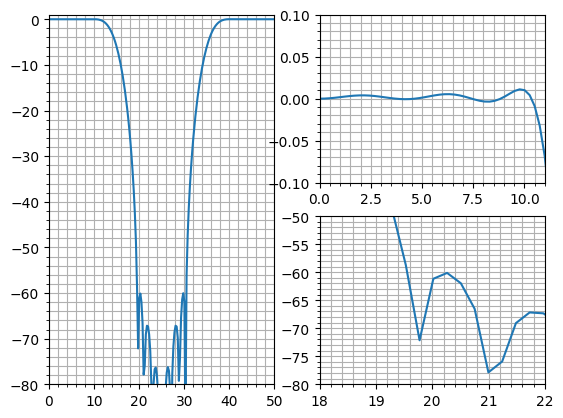

In [26]:
zero_packed_h2 = np.zeros(21*20)
zero_packed_h2[::20] = h2
f_sampling = 1000

freq_response = np.fft.fft(zero_packed_h2, num_fft)
freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 11
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 18, 22
y_min, y_max = -80, -50

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


#### Design an interpolating filter

estimated filter_length is 155


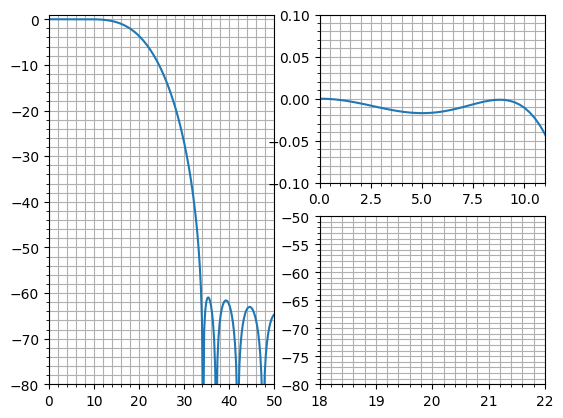

In [100]:
stop_band_attenuation = 60
f_sampling = 1000
f_transition = 24
f_minus_6db = 22
low_pass_filter_length = 155 # use 93
num_fft = 1024*4

# h = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
# h = h/sum(h)
h3 = get_low_pass_filter_tap_coeffiecients_using_kaiser_window_design(stop_band_attenuation, f_sampling, f_transition, f_minus_6db, low_pass_filter_length)
plot_filter_to_verify_spec(h3, num_fft, f_sampling)


In [106]:
cascaded_h = np.convolve(zero_packed_h2, h3)
print(cascaded_h.shape)

(574,)


(-80.0, -50.0)

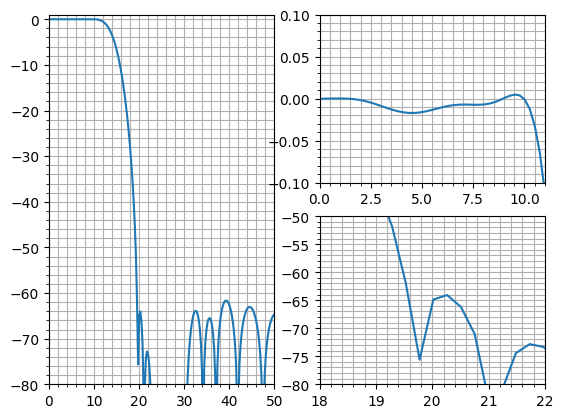

In [102]:
freq_response = np.fft.fft(cascaded_h, num_fft)
freq = np.arange(0, len(freq_response), 1)/len(freq_response) * f_sampling

plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-80, 1)

ax = plt.subplot(2,2,2)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 0, 11
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(freq, 20 * np.log10(abs(freq_response)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 18, 22
y_min, y_max = -80, -50

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#### Comparison of the workload
Single large filter requires 373 ops per input \
Cascade interpolated filter requires only 155 + 21 = 176 ops per input

Single large filter requires 373 taps \
Cascade interpolated filter requires 574 taps (21 taps * 20 due to zero-packing, then + 155 taps from interpolating filter and -1)